In [1]:
'''
SETUP
'''

import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

'''
https://keras.io/examples/graph/gnn_citations/
'''

'\nhttps://keras.io/examples/graph/gnn_citations/\n'

In [2]:
state = 'AL'

In [42]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df_expanded.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)


In [4]:
symptoms_dataframe_ri

,listingid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,cj_living_area,fips_code,...,grinder pump,immaculate custom,high efficiency,plenty room roam,neighborhood prattville,letson farms,one of a kind home,adjacent lot,luxury vinyl,spacious secondary bedrooms
0,226801671,202011,2020.0,19300,19300,AL,20201130,335000.0,1868.0,01003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,226026334,202008,2020.0,13820,13820,AL,20200709,191000.0,1450.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,226026939,202008,2020.0,13820,13820,AL,20200710,277000.0,3370.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226937042,202008,2020.0,13820,13820,AL,20200717,555000.0,4478.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,226937313,202008,2020.0,33860,33860,AL,20200803,247000.0,2697.0,01101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206270,10185777,200505,2013.0,13820,13820,AL,20050607,132500.0,1942.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206271,10173838,200508,2013.0,13820,13820,AL,20050715,190500.0,1692.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206272,10190012,200505,2013.0,13820,13820,AL,20050503,198900.0,1578.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206273,10202921,200511,2013.0,13820,13820,AL,20051103,124000.0,1526.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
symptoms_dataframe_ri['cbsa'].unique()

array(['19300', '13820', '33860', '33660', '45180', '46220', '20020',
       '42820', '21460', '29300', '37120', '18980', '45980', '26620',
       '27530', '10700', '22840', '11500', '19460', '12220', '10760',
       '22520', '47660', '21640', '17980', '12120', '23460'], dtype=object)

In [10]:
connections =  pd.DataFrame({'target' : [], 'source' : []})

In [11]:
#len(connections.index)

In [13]:
'''
Construct connections by cbsa and qtr
'''

for cbsa in symptoms_dataframe_ri['cbsa'].unique():
    print(cbsa)
    dtf_temp = symptoms_dataframe_ri[symptoms_dataframe_ri['cbsa']==cbsa]
    listingids = dtf_temp['listingid'].values
    for idd in range(len(listingids)-1):
        connections.loc[len(connections.index)] = [listingids[idd], listingids[idd+1]]
    connections.loc[len(connections.index)] = [listingids[idd+1], listingids[0]]
    

19300
13820
33860
33660
45180
46220
20020
42820
21460
29300
37120
18980
45980
26620
27530
10700
22840
11500
19460
12220
10760
22520
47660
21640
17980
12120
23460


In [14]:
connections

,target,source
0,226801671.0,226986207.0
1,226986207.0,226665830.0
2,226665830.0,226901628.0
3,226901628.0,226662172.0
4,226662172.0,226693847.0
...,...,...
219062,10267964.0,10247926.0
219063,10247926.0,10085997.0
219064,10085997.0,10171661.0
219065,10171661.0,10203225.0


In [15]:
connections['target'] = connections['target'].astype(np.int64)
connections['source'] = connections['source'].astype(np.int64)

In [16]:
connections.to_feather('comments/raw_comments/agent_comments_'+state+\
                        '_connections.fea')

In [18]:
#for i in range(len(citations)):
#    print(i)
#    df_temp = citations[citations['source']==citations[citations['target']==citations['target'][i]]['source'].values[0]]
#    df_temp.loc[:,'source'] = citations['target'][1]
#    connections = connections.append(df_temp)

In [19]:
connections = pd.read_feather('comments/raw_comments/agent_comments_'+state+\
                            '_connections.fea')

In [20]:
citations = connections.copy(deep=True)

In [22]:
citations

,target,source
0,226801671,226986207
1,226986207,226665830
2,226665830,226901628
3,226901628,226662172
4,226662172,226693847
...,...,...
219062,10267964,10247926
219063,10247926,10085997
219064,10085997,10171661
219065,10171661,10203225


In [74]:
citations[citations['source']== 218804551]

,target,source
184895,218729954,218804551


In [24]:
symptoms_dataframe_ri.columns[17:]

Index(['full bath', 'new stainless steel appliances', 'main level',
       'beautiful hardwood floors', 'granite countertops', 'separate shower',
       'great room', 'master bedroom', 'walkin closet', 'open floor plan',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2224)

In [43]:
column_names = ["listingid"] + list(symptoms_dataframe_ri.columns[17:]) +['avmerror']

In [44]:
papers = symptoms_dataframe_ri[column_names]

In [45]:
papers

,listingid,index,full bath,new stainless steel appliances,main level,beautiful hardwood floors,granite countertops,separate shower,great room,master bedroom,...,"separate shower, stainless appliances","separate shower, walkin closet","beautiful hardwood floors, full bath, main level","full bath, granite countertops, main level","full bath, great room, main level","full bath, laundry room, main level","full bath, main level, master bedroom","full bath, main level, master suite","full bath, main level, separate shower",avmerror
0,226801671,226801671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001285
1,226026334,226026334,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.057931
2,226026939,226026939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115589
3,226937042,226937042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100508
4,226937313,226937313,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.098501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205754,10185777,10185777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069276
205755,10173838,10173838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029501
205756,10190012,10190012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149320
205757,10202921,10202921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.083307


In [46]:
from sklearn.preprocessing import KBinsDiscretizer
nclasses = 3
discretizer = KBinsDiscretizer(n_bins=nclasses, encode='ordinal', strategy='quantile')

In [47]:

Series = papers.avmerror.values

discretizer.fit(Series.reshape(-1,1))
Series_disctzd = discretizer.transform(Series.reshape(-1,1))

print(discretizer.bin_edges_[0])

[-1.49706191 -0.03485273  0.06933552  0.59987996]


In [48]:
papers['avmerror'] = Series_disctzd

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
papers

,listingid,index,full bath,new stainless steel appliances,main level,beautiful hardwood floors,granite countertops,separate shower,great room,master bedroom,...,"separate shower, stainless appliances","separate shower, walkin closet","beautiful hardwood floors, full bath, main level","full bath, granite countertops, main level","full bath, great room, main level","full bath, laundry room, main level","full bath, main level, master bedroom","full bath, main level, master suite","full bath, main level, separate shower",avmerror
0,226801671,226801671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,226026334,226026334,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,226026939,226026939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,226937042,226937042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,226937313,226937313,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205754,10185777,10185777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205755,10173838,10173838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205756,10190012,10190012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
205757,10202921,10202921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
print(papers.sample(2).T)

                                            74397       145365
listingid                               24316243.0  10421306.0
index                                   24316243.0  10421306.0
full bath                                      0.0         0.0
new stainless steel appliances                 0.0         0.0
main level                                     0.0         1.0
...                                            ...         ...
full bath, laundry room, main level            0.0         0.0
full bath, main level, master bedroom          0.0         0.0
full bath, main level, master suite            0.0         0.0
full bath, main level, separate shower         0.0         0.0
avmerror                                       2.0         0.0

[2387 rows x 2 columns]


In [51]:
print(papers.avmerror.value_counts())

2.0    68587
1.0    68587
0.0    68585
Name: avmerror, dtype: int64


In [52]:
class_values = sorted(papers["avmerror"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["listingid"].unique()))}


In [53]:
paper_idx

{776: 0,
 778: 1,
 781: 2,
 783: 3,
 932: 4,
 2467: 5,
 2468: 6,
 4642: 7,
 7577: 8,
 8922: 9,
 8923: 10,
 10067: 11,
 14570: 12,
 17938: 13,
 17939: 14,
 18311: 15,
 18415: 16,
 18705: 17,
 18793: 18,
 18794: 19,
 19067: 20,
 20230: 21,
 20231: 22,
 20232: 23,
 20782: 24,
 21335: 25,
 21519: 26,
 21520: 27,
 21711: 28,
 21891: 29,
 21892: 30,
 21895: 31,
 22220: 32,
 22222: 33,
 22223: 34,
 22225: 35,
 22226: 36,
 22520: 37,
 22521: 38,
 22522: 39,
 22523: 40,
 22524: 41,
 23998: 42,
 24864: 43,
 24866: 44,
 24868: 45,
 25808: 46,
 25809: 47,
 26629: 48,
 26631: 49,
 27149: 50,
 27150: 51,
 27151: 52,
 27152: 53,
 27153: 54,
 27154: 55,
 27183: 56,
 27184: 57,
 27185: 58,
 27186: 59,
 27187: 60,
 27188: 61,
 27190: 62,
 28313: 63,
 28314: 64,
 28638: 65,
 28639: 66,
 28641: 67,
 28699: 68,
 28940: 69,
 29298: 70,
 29299: 71,
 29301: 72,
 30834: 73,
 34534: 74,
 35953: 75,
 35955: 76,
 37330: 77,
 37331: 78,
 37332: 79,
 37334: 80,
 38041: 81,
 38042: 82,
 38636: 83,
 38697: 84,
 38699

In [54]:
class_idx

{0.0: 0, 1.0: 1, 2.0: 2}

In [55]:

#papers["listingid"] = papers["listingid"].apply(lambda name: paper_idx[name])
#citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
#citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
#papers["avmerror"] = papers["avmerror"].apply(lambda value: class_idx[value])

In [56]:
papers[papers['listingid']==226642703 ]

,listingid,index,full bath,new stainless steel appliances,main level,beautiful hardwood floors,granite countertops,separate shower,great room,master bedroom,...,"separate shower, stainless appliances","separate shower, walkin closet","beautiful hardwood floors, full bath, main level","full bath, granite countertops, main level","full bath, great room, main level","full bath, laundry room, main level","full bath, main level, master bedroom","full bath, main level, master suite","full bath, main level, separate shower",avmerror
212,226642703,226642703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


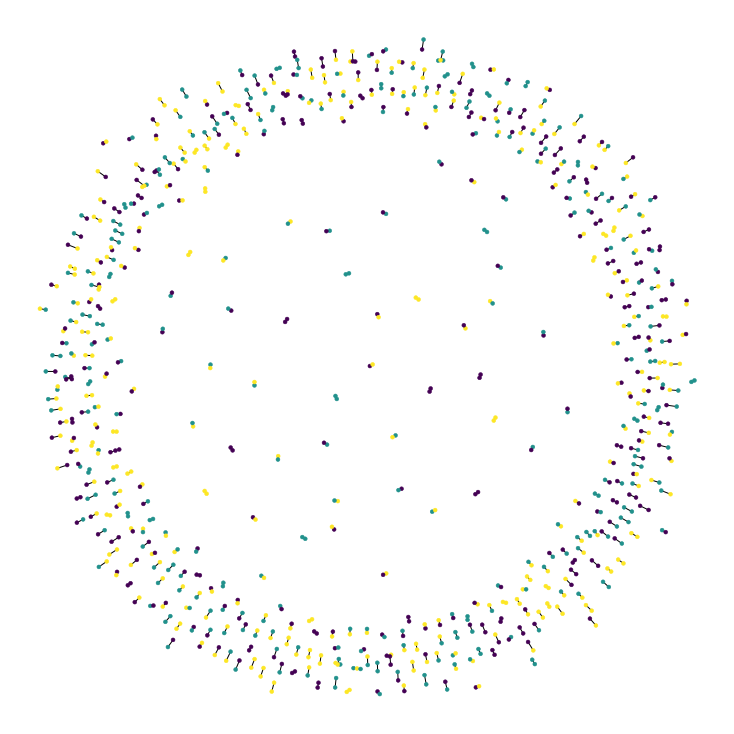

In [40]:
plt.figure(figsize=(10, 10))
colors = papers["avmerror"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=500))
subjects = list(papers[papers["listingid"].isin(list(cora_graph.nodes))]["avmerror"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)

In [57]:
train_data, test_data = [], []

for _, group_data in papers.groupby("avmerror"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (103104, 2387)
Test data shape: (102655, 2387)


In [58]:
hidden_units = [100, 50]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 20
batch_size = 2000

In [59]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [60]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [61]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [62]:
feature_names = set(papers.columns) - {"listingid", "avmerror"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["avmerror"]
y_test = test_data["avmerror"]

In [63]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_features (InputLayer)     [(None, 2385)]       0                                            
__________________________________________________________________________________________________
ffn_block1 (Sequential)         (None, 50)           253590      input_features[0][0]             
__________________________________________________________________________________________________
ffn_block2 (Sequential)         (None, 50)           10750       ffn_block1[0][0]                 
__________________________________________________________________________________________________
skip_connection2 (Add)          (None, 50)           0           ffn_block1[0][0]                 
                                                                 ffn_block2[0][0]          

In [64]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/20
44/44 [==============================] - 14s 211ms/step - loss: 1.3691 - acc: 0.3410 - val_loss: 1.1003 - val_acc: 0.3293
Epoch 2/20
44/44 [==============================] - 12s 282ms/step - loss: 1.1198 - acc: 0.3498 - val_loss: 1.0982 - val_acc: 0.3349
Epoch 3/20
44/44 [==============================] - 15s 334ms/step - loss: 1.0987 - acc: 0.3637 - val_loss: 1.0977 - val_acc: 0.3347
Epoch 4/20
44/44 [==============================] - 13s 303ms/step - loss: 1.0933 - acc: 0.3773 - val_loss: 1.0931 - val_acc: 0.3890
Epoch 5/20
44/44 [==============================] - 11s 247ms/step - loss: 1.0867 - acc: 0.3872 - val_loss: 1.0889 - val_acc: 0.3976
Epoch 6/20
44/44 [==============================] - 14s 323ms/step - loss: 1.0822 - acc: 0.3928 - val_loss: 1.0868 - val_acc: 0.3904
Epoch 7/20
44/44 [==============================] - 14s 307ms/step - loss: 1.0787 - acc: 0.4040 - val_loss: 1.0825 - val_acc: 0.4145
Epoch 8/20
44/44 [==============================] - 13s 303ms/step - 

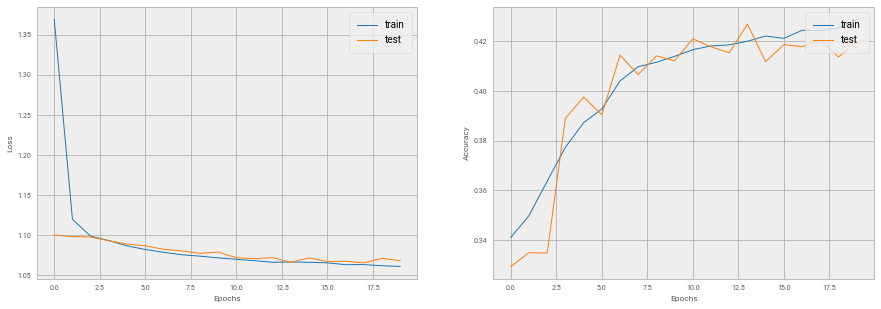

In [65]:
display_learning_curves(history)

In [66]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 42.36%


In [67]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    papers.sort_values("listingid")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 219067)
Nodes shape: (205759, 2385)


In [82]:
node_features

<tf.Tensor: shape=(205759, 2385), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [68]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [98]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        print(self.edges)
        print(self.edges.shape)
        print(self.edges[self.edges==15450129]) 
        print(x)
        print(self.edge_weights)
        print(self.edge_weights.shape)
        x1 = self.conv1((x, self.edges, self.edge_weights))
        print(self.edges.shape)
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [99]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

[[226986207 226665830 226901628 ...  10171661  10203225  10370485]
 [226801671 226986207 226665830 ...  10085997  10171661  10203225]]
(2, 219067)
[15450129 15450129]
tf.Tensor(
[[ 3.6197189e+01  2.3461433e-02 -3.0301494e-04 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 3.6190437e+01 -1.2066972e-02 -2.8056637e-04 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 3.6453033e+01 -5.7454561e-03 -4.0930303e-04 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 ...
 [ 1.1732372e+07  5.8686265e+03 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 1.1732777e+07  5.8691069e+03 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 1.1738701e+07  5.8715000e+03 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]], shape=(205759, 50), dtype=float32)
tf.Tensor(
[4.5648135e-06 4.5648135e-06 4.5648135e-06 ... 4.5648135e-06 4.5648135e-06
 4.5648135e-06], shape=(219067,), dtype=float32)
(219067,)


InvalidArgumentError: indices[118128] = 10395387 is not in [0, 205759) [Op:GatherV2]

In [ ]:
graph_info

In [ ]:
x_train = train_data.listingid.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

In [ ]:
display_learning_curves(history)

In [ ]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [ ]:
# First we add the N new_instances as nodes to the graph
# by appending the new_instance to node_features.
num_nodes = node_features.shape[0]
new_node_features = np.concatenate([node_features, new_instances])
# Second we add the M edges (citations) from each new node to a set
# of existing nodes in a particular subject
new_node_indices = [i + num_nodes for i in range(num_classes)]
new_citations = []
for subject_idx, group in papers.groupby("subject"):
    subject_papers = list(group.paper_id)
    # Select random x papers specific subject.
    selected_paper_indices1 = np.random.choice(subject_papers, 5)
    # Select random y papers from any subject (where y < x).
    selected_paper_indices2 = np.random.choice(list(papers.paper_id), 2)
    # Merge the selected paper indices.
    selected_paper_indices = np.concatenate(
        [selected_paper_indices1, selected_paper_indices2], axis=0
    )
    # Create edges between a citing paper idx and the selected cited papers.
    citing_paper_indx = new_node_indices[subject_idx]
    for cited_paper_idx in selected_paper_indices:
        new_citations.append([citing_paper_indx, cited_paper_idx])

new_citations = np.array(new_citations).T
new_edges = np.concatenate([edges, new_citations], axis=1)

In [ ]:
print("Original node_features shape:", gnn_model.node_features.shape)
print("Original edges shape:", gnn_model.edges.shape)
gnn_model.node_features = new_node_features
gnn_model.edges = new_edges
gnn_model.edge_weights = tf.ones(shape=new_edges.shape[1])
print("New node_features shape:", gnn_model.node_features.shape)
print("New edges shape:", gnn_model.edges.shape)

logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()


In [ ]:
display_class_probabilities(probabilities[:,0,:])

In [ ]:
probabilities[:,0,:].shape